## Project Proposal

#### Introduction
Data science is an increasingly popular field as industries have recently realized the importance and value of data analysis. As such, the demand for skilled data scientists has and continues to grow. Being students in STAT 201: Introduction to Statistics for Data Science, we are interested in the salaries that data scientists might have. A 2015 data science salary survey publish by O’Reilly Media reported that the “median annual base salary … among US respondents is $104,000” (in USD). The same survey also reported that 67% of their survey respondents were from the USA and 18% were from Europe, including the United Kingdom and Ireland.

While previous years’ salaries are known, we wanted to compare more recent salaries of data scientists who work at companies based in the USA versus Great Britain (GB). As the US and GB are countries with the highest number of data scientists, we decided to only compare those two. The exact question we wanted to answer is:

*Are the salaries of mid-level data scientists different for those who work at companies based in the USA vs companies based in GB?*

To answer this question, we will perform statistical inference on the Data Science Job Salaries data set from Kaggle, with responses coming from the website ai-jobs.net Salaries. The dataset includes variables such as the year of pay (2020 - 2022), experience level (EN Entry-level, Junior MI Mid-level, Intermediate SE Senior-level, Expert EX Executive-level, Director), salary in USD, employee's primary country of residency, country of the employer's main office or contracting branch, company size, and more.

To compare salaries, we will use bootstrapping (and asymptotics?) to identify the mean and interquartile ranges for Data Scientists’ salaries of those working for USA and GB companies.


#### Preliminary Results

In [1]:
#Load these Libraries
library(repr)
library(tidyverse)
library(infer)
library(dplyr)
library(cowplot)
library(digest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
## read dataset from web; clean and wrangle data into tidy format
data <- read_csv("https://raw.githubusercontent.com/SotaUe/Stat201/main/ds_salaries.csv") %>%
    select(salary_in_usd, company_location, experience_level) %>%
    filter(company_location %in% c("US", "GB"), experience_level == "MI")
head(data)

count <- data %>%
    count(company_location)
count


New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


salary_in_usd,company_location,experience_level
<dbl>,<chr>,<chr>
135000,US,MI
87000,US,MI
85000,US,MI
56000,US,MI
98000,US,MI
450000,US,MI


company_location,n
<chr>,<int>
GB,30
US,90


As the table above shows, the dataset includes 30 respondents working at a Great Britain company and 90 respondents working at a United States company.

The following code plots a visualization of a sample from our raw data and the estimates of our parameter of interest, mean salary in USD, for those working at US and GB companies.

US_mean,GB_mean
<dbl>,<dbl>
160356.5,83873


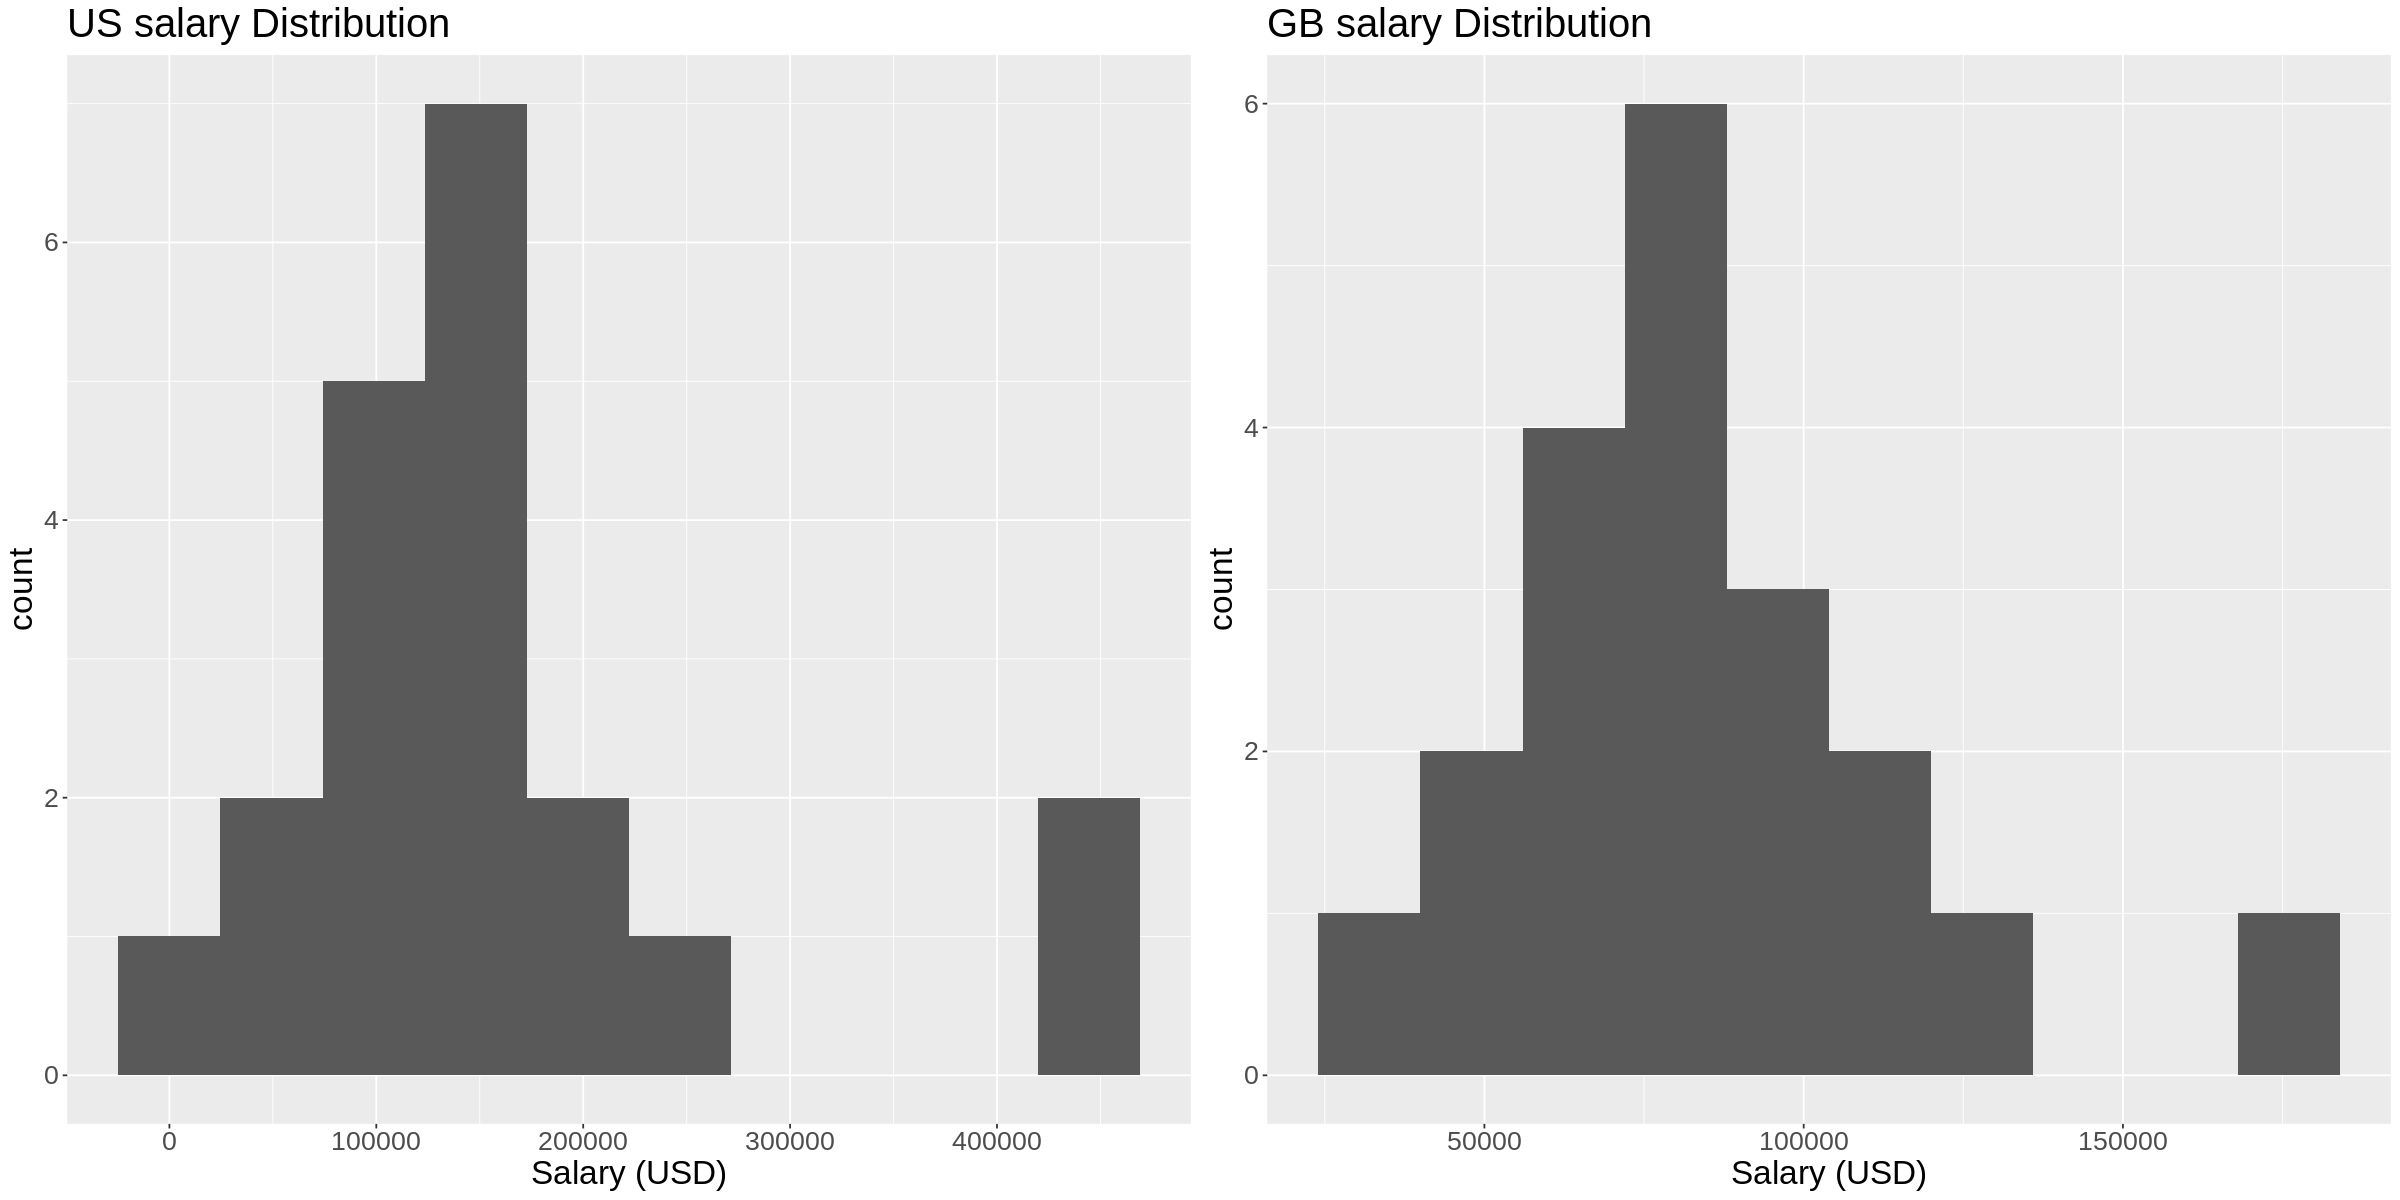

In [3]:
options(repr.plot.width = 20, repr.plot.height = 10, scipen = 1)

set.seed(11)
us_sample <- data %>%
    filter(company_location == "US") %>%
    rep_sample_n(20)

gb_sample <- data %>%
    filter(company_location == "GB") %>%
    rep_sample_n(20)

us_sample_dist <- us_sample %>%
    ggplot(aes(x= salary_in_usd)) +
    geom_histogram(bins=10) +
    ggtitle("US salary Distribution") +
    xlab("Salary (USD)") +
    theme(text= element_text(size=20))

gb_sample_dist <- gb_sample %>%
    ggplot(aes(x= salary_in_usd)) +
    geom_histogram(bins=10) +
    ggtitle("GB salary Distribution") +
    xlab("Salary (USD)") +
    theme(text= element_text(size=20))

US_mean <- us_sample %>%
    summarize(mean_salary_in_usd = mean(salary_in_usd)) %>%
    select(mean_salary_in_usd)%>%
    as.numeric()

GB_mean <- gb_sample %>%
    summarize(mean_salary_in_usd = mean(salary_in_usd)) %>%
    select(mean_salary_in_usd)%>%
    as.numeric()

table_means <- tibble(US_mean, GB_mean)
table_means
plot_grid(us_sample_dist, gb_sample_dist)


#### Methods:Plan

While this report uses recent data (2020-2022) from a trustworthy source, the preliminary plots and estimates that were produced only show a small snapshot of data scientist salaries. As we do not have access to the salaries of all data scientists, we can use techniques such as bootstrapping, and potentially asymptotics, to create a better estimation of the population mean salaries. For bootstrapping, we plan to do it with 10000 repetitions and size 20. Later on, we may compare the outcomes from both the bootstrapping and asymptotics methods.

The null hypothesis Ho is that the *mean salary of US companies is the same as the mean salary of GB companies.* The alternative hypothesis Ha is that the *mean salary US is different from the mean salary of GB companies.* The hypothesis test will be performed at a alpha level = 0.05 and we will find a 95% confidence interval. For scale parameter, we decide to use the interquartile range instead of sd, as our graph above is right-skewed. 

Our final report is expected to find differences in the average salary for data scientists in the US and GB by performing a two-tailed hypothesis test. We expect the average salary in GB will be different (lower) than that of those in the US given the information we have obtained from the internet (reference?).

The impact such findings could have are if people with data science career may consider going to the US over GB in order to make more money.

Follow up questions may include: What are the annual average living costs in each of these countries? How does that affect the salary of data science jobs if at all? What is the demand for data scientists in each of these countries? Will this affect the salary for data scientists?


#### References

Bhatia, R. (2022, June). Data Science Job Salaries: Salaries of Jobs in the Data Science Domain, Version 1. Retrieved July 21, 2022 from https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries.

King J, Magoulas R. 2015 data science salary survey. O'Reilly Media, Incorporated; 2015.
http://www.eli.sdsu.edu/courses/fall16/cs696/2015-data-science-salary-survey.pdf

Waller MA, Fawcett SE. Data science, predictive analytics, and big data: a revolution that will transform supply chain design and management. Journal of Business Logistics. 2013 Jun;34(2):77-84.
https://onlinelibrary.wiley.com/doi/full/10.1111/jbl.12010
